# Read the Dataset Into a Pandas DataFrame

In [1]:
import pandas as pd
data = pd.read_csv('covid_data.csv') # read data from csv file

# Gather All Information and Statistics

In [2]:
print(data.head()) # print first 5 rows and all 67 columns

  iso_code continent     location        date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan  2020-02-24          5.0        5.0   
1      AFG      Asia  Afghanistan  2020-02-25          5.0        0.0   
2      AFG      Asia  Afghanistan  2020-02-26          5.0        0.0   
3      AFG      Asia  Afghanistan  2020-02-27          5.0        0.0   
4      AFG      Asia  Afghanistan  2020-02-28          5.0        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0                 NaN           NaN         NaN                  NaN  ...   
1                 NaN           NaN         NaN                  NaN  ...   
2                 NaN           NaN         NaN                  NaN  ...   
3                 NaN           NaN         NaN                  NaN  ...   
4                 NaN           NaN         NaN                  NaN  ...   

   male_smokers  handwashing_facilities  hospital_beds_per_thousand  \
0           NaN            

In [3]:
print(data.info()) # print information about data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228983 entries, 0 to 228982
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    228983 non-null  object 
 1   continent                                   216050 non-null  object 
 2   location                                    228983 non-null  object 
 3   date                                        228983 non-null  object 
 4   total_cases                                 215997 non-null  float64
 5   new_cases                                   215741 non-null  float64
 6   new_cases_smoothed                          214545 non-null  float64
 7   total_deaths                                196813 non-null  float64
 8   new_deaths                                  196763 non-null  float64
 9   new_deaths_smoothed                         195583 non-null  float64
 

In [4]:
print(data.describe()) # print statistics about data

        total_cases     new_cases  new_cases_smoothed  total_deaths  \
count  2.159970e+05  2.157410e+05        2.145450e+05  1.968130e+05   
mean   4.410898e+06  1.239274e+04        1.242634e+04  7.380919e+04   
std    2.758180e+07  8.540771e+04        8.345873e+04  3.796541e+05   
min    1.000000e+00  0.000000e+00        0.000000e+00  1.000000e+00   
25%    4.294000e+03  0.000000e+00        6.000000e+00  1.130000e+02   
50%    4.865800e+04  5.400000e+01        9.457100e+01  1.169000e+03   
75%    5.186320e+05  9.600000e+02        1.129286e+03  9.726000e+03   
max    6.267835e+08  4.081954e+06        3.436022e+06  6.575340e+06   

          new_deaths  new_deaths_smoothed  total_cases_per_million  \
count  196763.000000        195583.000000            215010.000000   
mean      138.777138           139.447612             59770.411473   
std       731.163458           716.731854            106030.314864   
min         0.000000             0.000000                 0.001000   
25%       

In [5]:
print("Shape of Dataset before preprocessing: ", data.shape) # print shape of data

Shape of Dataset before preprocessing:  (228983, 67)


# Preprocessing the Data

In [6]:
data = pd.read_csv('covid_data.csv')

'''
Remove all columns having 60% or more missing values
'''
threshold = len(data) * 0.6  # Calculate threshold for 60% of total rows
data.dropna(axis=1, thresh=threshold, inplace=True)  # Remove columns not meeting threshold

'''
Remove all rows having missing values
'''
data.dropna(inplace=True)  # remove rows having any missing values

'''
Drop all columns which have the word 'smoothed' in their column names
'''
data = data[data.columns.drop(list(data.filter(regex = 'smoothed')))] # drop all columns which have the word 'smoothed' in their column names

'''
Convert date to datetime datatype and set it as index
'''
data['date'] = pd.to_datetime(data['date']) # convert date to datetime datatype
data.set_index('date', inplace = True) # set date as index

'''
Check and confirm that there are no more missing values in the resulting dataset
'''
print("Missing values: ", data.isnull().sum().sum()) # check and confirm that there are no more missing values in the resulting dataset

print("Shape of Dataset after preprocessing: ", data.shape) # print shape of data

Missing values:  0
Shape of Dataset after preprocessing:  (109240, 26)


# Plot High Level Charts

In [1]:
import matplotlib.pyplot as plt

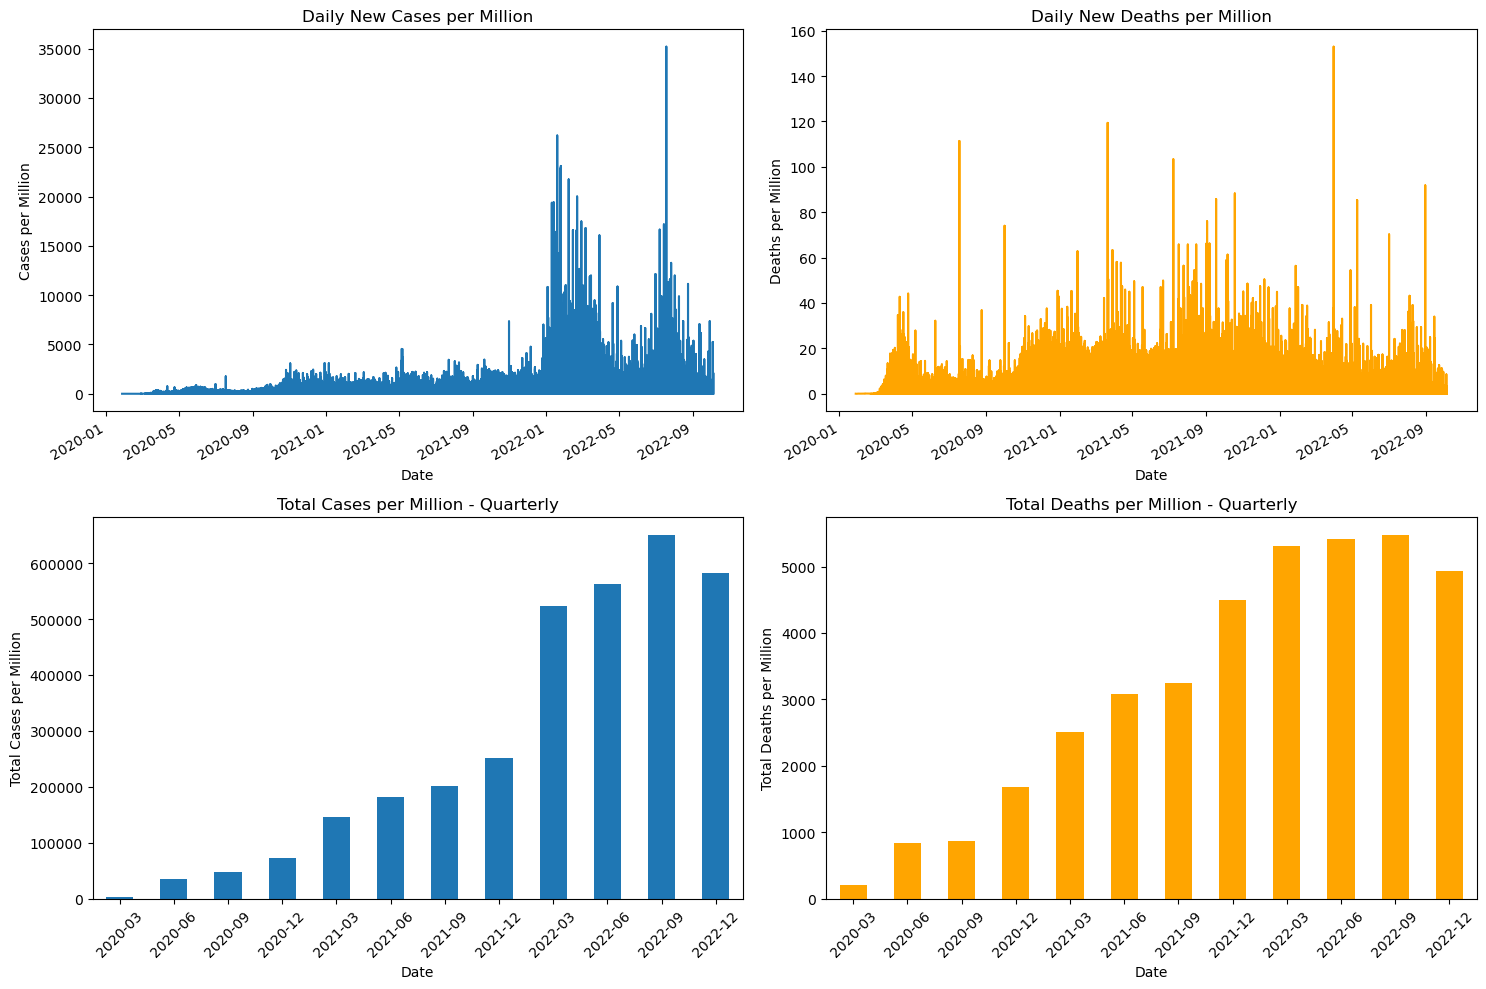

In [8]:
# Plotting
fig, ax = plt.subplots(2, 2, figsize=(15, 10)) # create a figure and a set of subplots

'''
Daily new cases per million worldwide
'''
data['new_cases_per_million'].plot(ax=ax[0, 0], title='Daily New Cases per Million') # plot daily new cases per million worldwide
ax[0, 0].set_ylabel("Cases per Million") # set y-axis label
ax[0, 0].set_xlabel("Date") # set x-axis label

'''
Daily new deaths per million worldwide
'''
data['new_deaths_per_million'].plot(ax=ax[0, 1], color='orange',title='Daily New Deaths per Million') # plot daily new deaths per million worldwide
ax[0, 1].set_ylabel("Deaths per Million") # set y-axis label
ax[0, 1].set_xlabel("Date") # set x-axis label

'''
Total cases per million on a quarterly basis
'''
quarterly_cases = data['total_cases_per_million'].resample('Q').max() # calculate total cases per million on a quarterly basis
quarterly_cases.plot(kind='bar', ax=ax[1, 0], title='Total Cases per Million - Quarterly') # plot total cases per million on a quarterly basis
ax[1, 0].set_ylabel("Total Cases per Million") # set y-axis label
ax[1, 0].set_xlabel("Date") # set x-axis label
ax[1, 0].set_xticklabels([pd.to_datetime(str(x)).strftime('%Y-%m') for x in quarterly_cases.index], rotation=45) # set x-axis labels

'''
Total deaths per million on a quarterly basis
'''
quarterly_deaths = data['total_deaths_per_million'].resample('Q').max() # calculate total deaths per million on a quarterly basis
quarterly_deaths.plot(kind='bar', ax=ax[1, 1], color='orange', title='Total Deaths per Million - Quarterly') # plot total deaths per million on a quarterly basis
ax[1, 1].set_ylabel("Total Deaths per Million") # set y-axis label
ax[1, 1].set_xlabel("Date") # set x-axis label
ax[1, 1].set_xticklabels([pd.to_datetime(str(x)).strftime('%Y-%m') for x in quarterly_deaths.index], rotation=45) # set x-axis labels

plt.tight_layout() # adjust subplots to fit into figure area
plt.show() # display plots

# Plot New Cases In USA, India, Russia, France, and China.

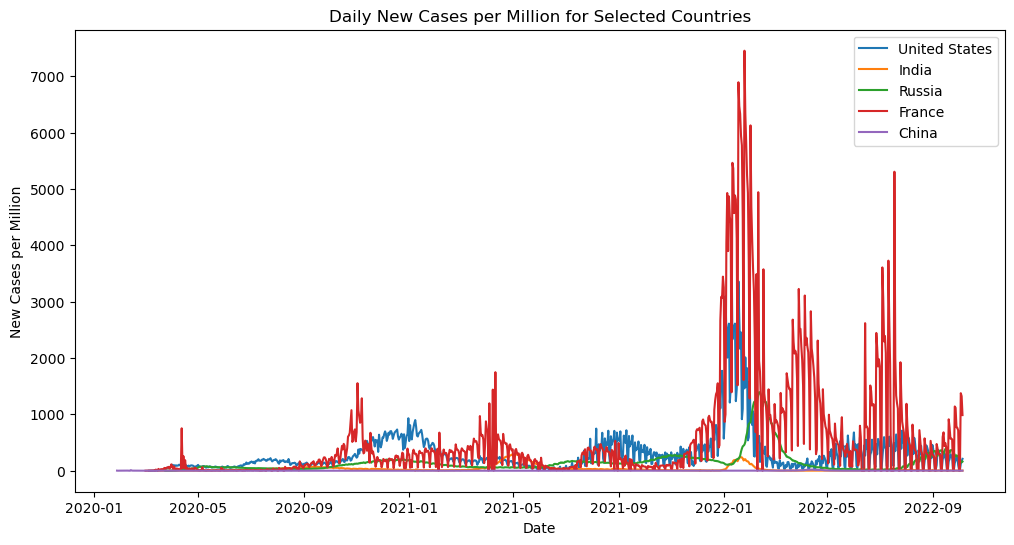

In [9]:
countries = ['United States', 'India', 'Russia', 'France', 'China'] # list of countries to plot
filtered_data = data[data['location'].isin(countries)] # filter data for selected countries

plt.figure(figsize=(12, 6)) # create a figure
for country in countries: # iterate over countries
    country_data = filtered_data[filtered_data['location'] == country] # filter data for current country
    plt.plot(country_data.index, country_data['new_cases_per_million'], label=country) # plot daily new cases per million for current country

plt.title('Daily New Cases per Million for Selected Countries') # set title
plt.xlabel('Date')  # set x-axis label
plt.ylabel('New Cases per Million') # set y-axis label
plt.legend() # display legend
plt.show() # display plot

# Group Country Codes Into a New DataFrame

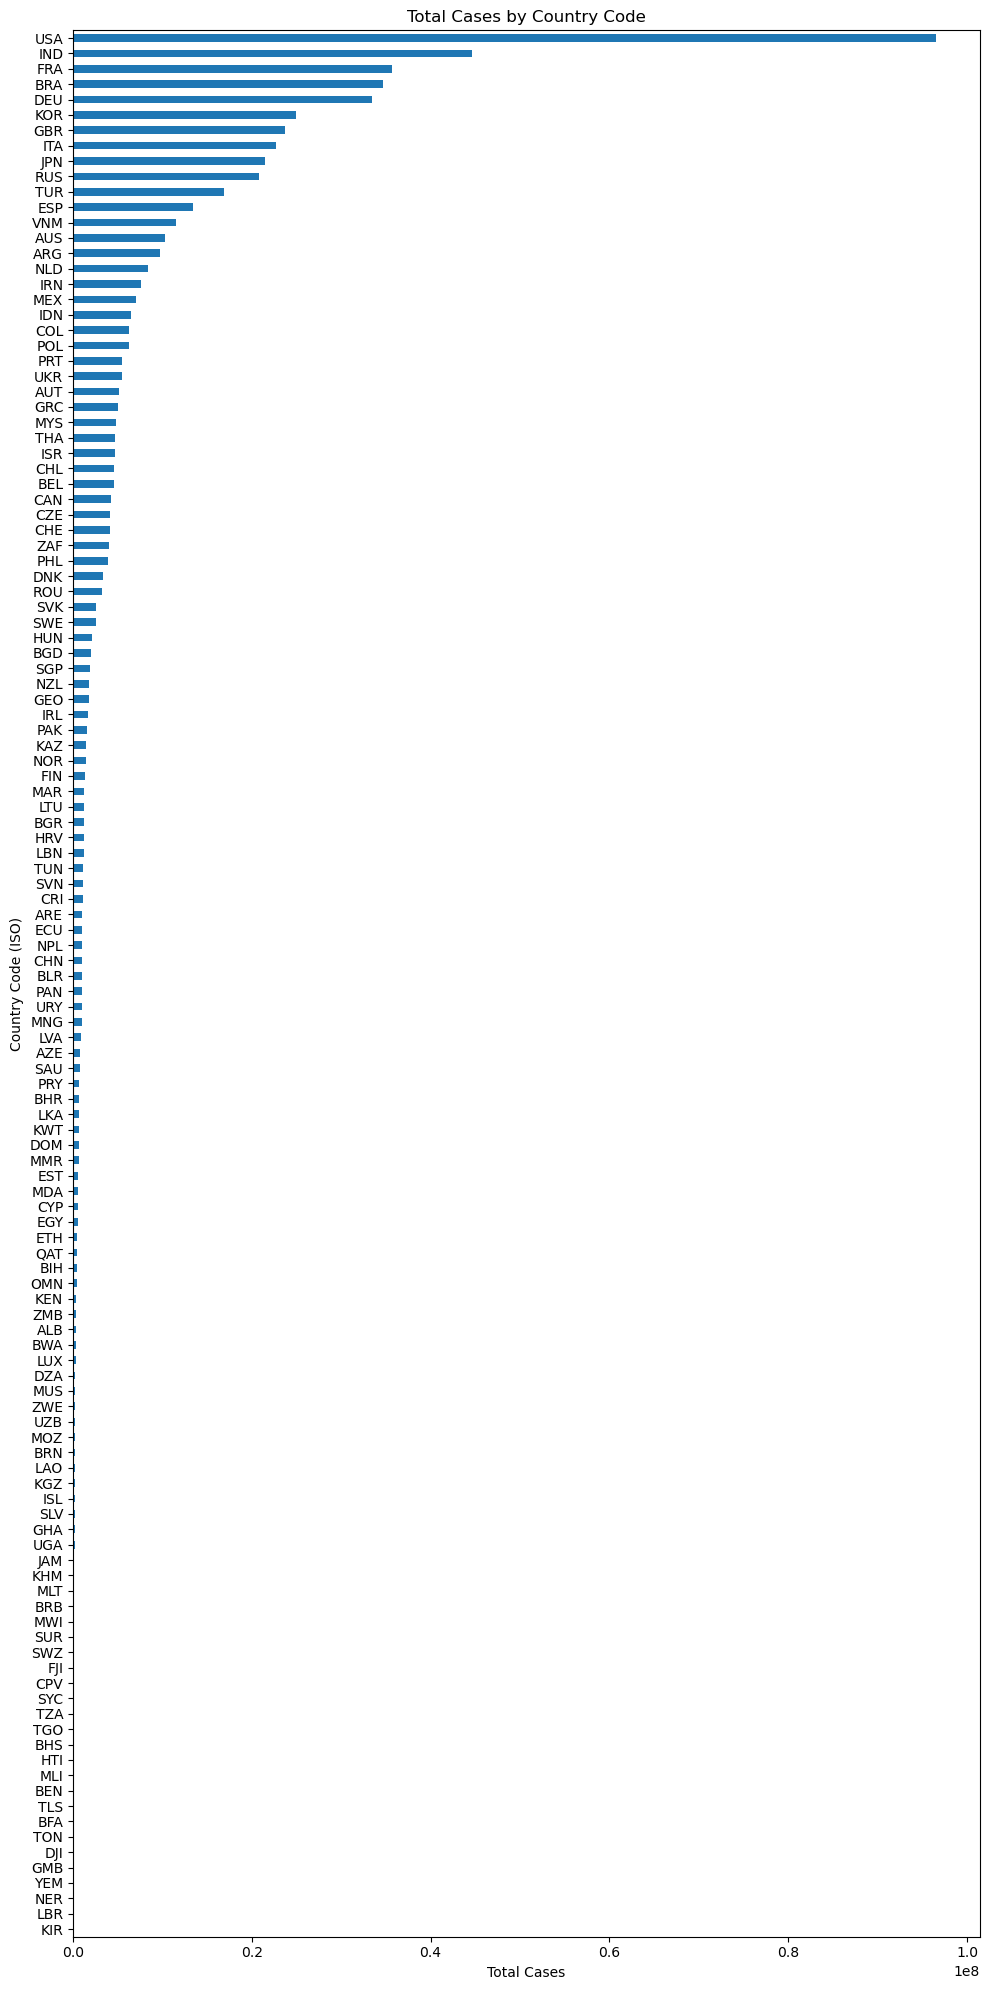

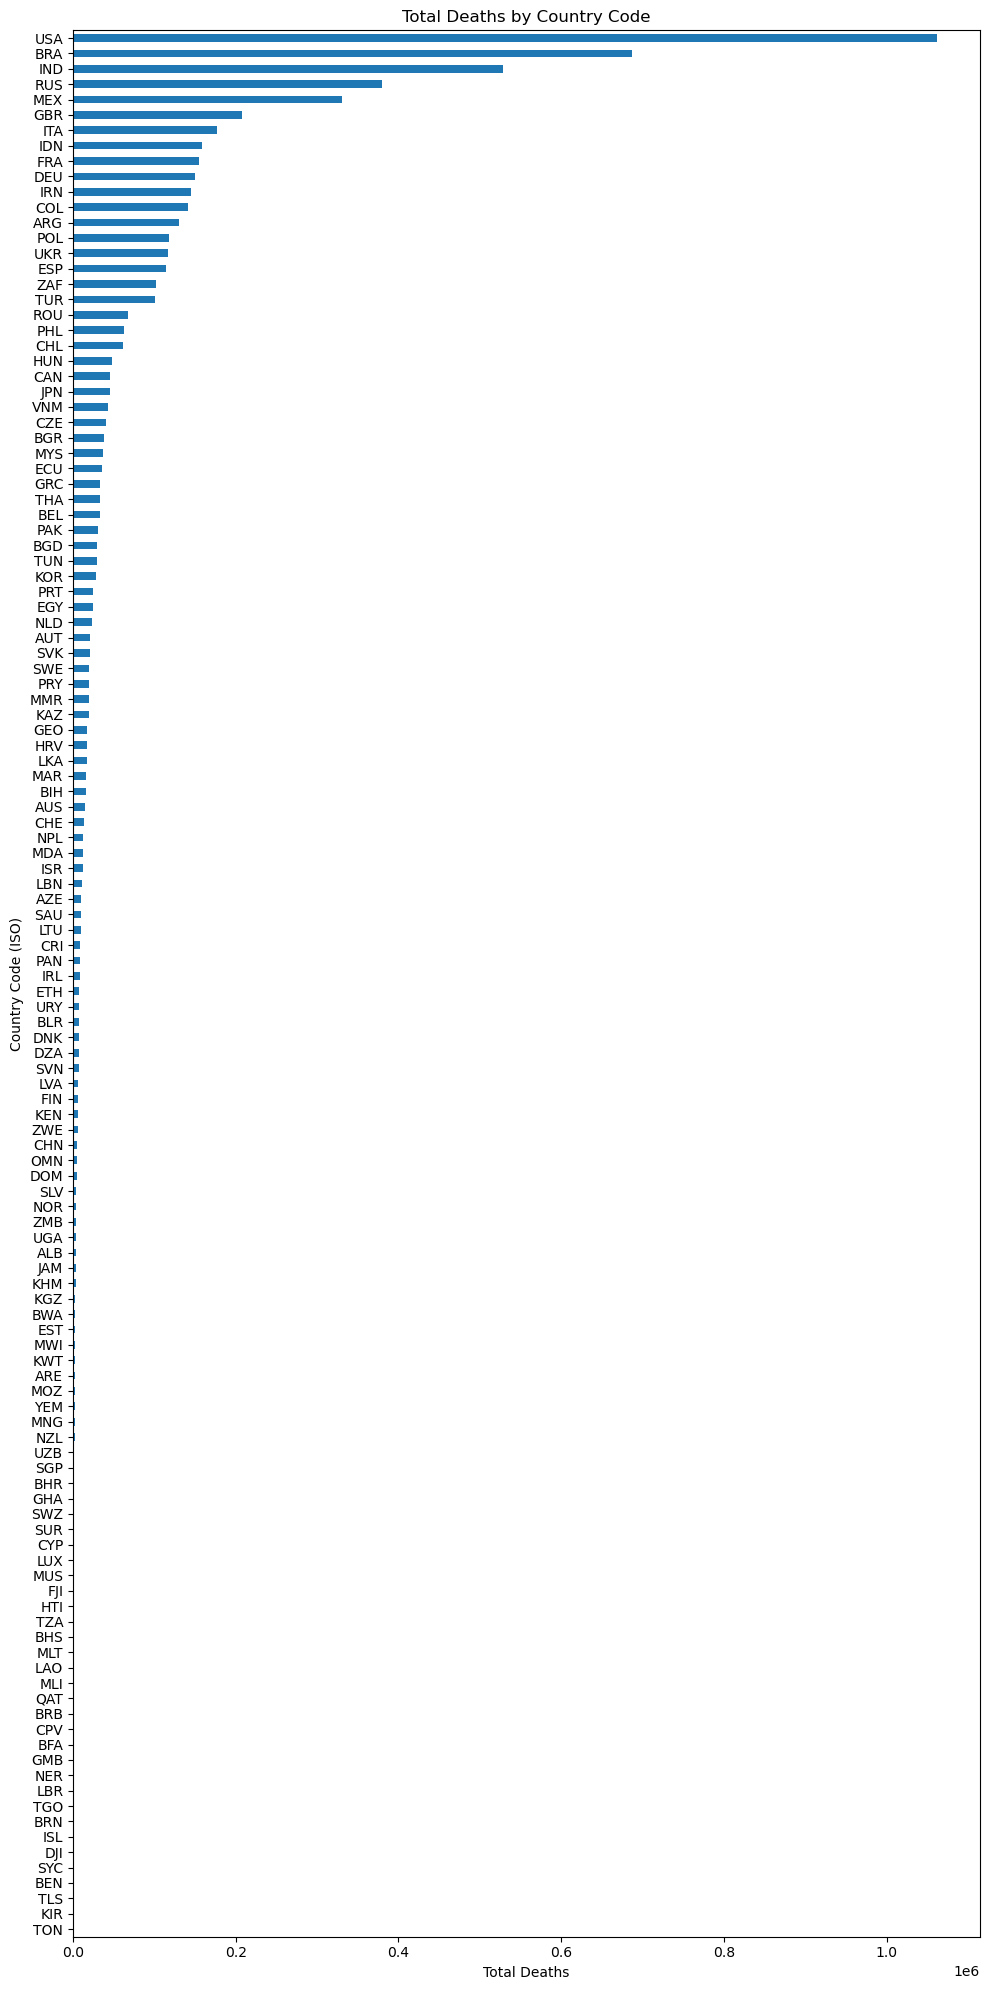

In [10]:
# Group by 'iso code' and sum up the relevant columns
grouped_data = data.groupby('iso_code').agg({'total_cases': 'max', 'total_deaths': 'max'})

'''
Plot the total cases iso code wise as a horizontal bar chart.
'''
plt.figure(figsize=(10, 20))  # Adjust the figure size so that the plot is clean and shows all the countries
grouped_data['total_cases'].sort_values().plot(kind='barh', title='Total Cases by Country Code') # Plot the data in horizontal bar chart
plt.xlabel('Total Cases') # set x-axis label
plt.ylabel('Country Code (ISO)') # set y-axis label
plt.tight_layout() # adjust subplots to fit into figure area
plt.show() # display plot

'''
Plot the total deaths iso code wise as a horizontal bar chart.
'''
plt.figure(figsize=(10, 20))  # Adjust the figure size so that the plot is clean and shows all the countries
grouped_data['total_deaths'].sort_values().plot(kind='barh', title='Total Deaths by Country Code') # Plot the data in horizontal bar chart
plt.xlabel('Total Deaths') # set x-axis label
plt.ylabel('Country Code (ISO)') # set y-axis label
plt.tight_layout() # adjust subplots to fit into figure area
plt.show() # display plot